In [1]:
import open3d as o3d
import numpy as np

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [7]:
pcd = o3d.io.read_point_cloud("../data/driveable_full.pcd")
pcd = pcd.voxel_down_sample(0.5)

In [8]:
points = np.asarray(pcd.points)

In [9]:
points.shape

(121101, 3)

In [10]:
import matplotlib.pyplot as plt

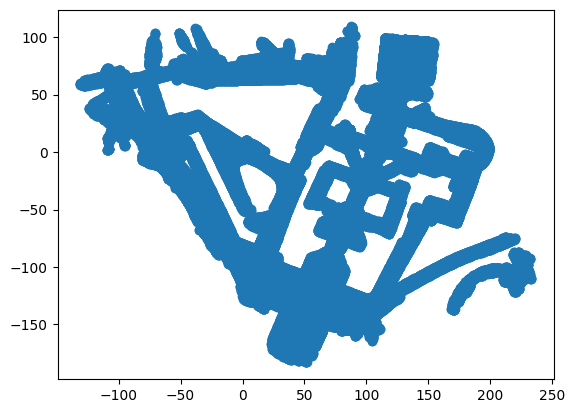

In [11]:
plt.scatter(points[:, 0], points[:, 1])

In [ ]:
geo_offset = [-154100.0, -6581400.0, 0.0];
333514.144, 6582476.789

In [12]:
333514-154100

179414

In [13]:
6582476-6581400

1076

In [36]:
poles = """[14:53:04] [Picked]	- P#8041700 (146.566742;79.255058;41.023289)
[14:53:12] [Picked]	- P#8217143 (142.466736;91.705055;41.115650)
[14:53:17] [Picked]	- P#8222085 (126.216736;92.605057;41.104210)
[14:54:37] [Picked]	- P#8092340 (119.766739;80.955055;41.003345)
[14:54:43] [Picked]	- P#7559935 (124.216736;69.255058;40.889820)
"""

In [37]:
utm_poles = [[(333667.0904009355, 6582497.621538126), (333662.8842953269, 6582510.554668535), (333647.15234680485, 6582513.131081785), (333640.6061986575, 6582502.429963917), (333644.7104149597, 6582490.045151316)]]

In [38]:
poles = poles.split("\n")[:5]
poles

['[14:53:04] [Picked]\t- P#8041700 (146.566742;79.255058;41.023289)',
 '[14:53:12] [Picked]\t- P#8217143 (142.466736;91.705055;41.115650)',
 '[14:53:17] [Picked]\t- P#8222085 (126.216736;92.605057;41.104210)',
 '[14:54:37] [Picked]\t- P#8092340 (119.766739;80.955055;41.003345)',
 '[14:54:43] [Picked]\t- P#7559935 (124.216736;69.255058;40.889820)']

In [39]:
poles = [pole.split("(")[-1].split(")")[0].split(";") for pole in poles]

In [40]:
poles

[['146.566742', '79.255058', '41.023289'],
 ['142.466736', '91.705055', '41.115650'],
 ['126.216736', '92.605057', '41.104210'],
 ['119.766739', '80.955055', '41.003345'],
 ['124.216736', '69.255058', '40.889820']]

In [41]:
poles = [float(pc) for pole in poles for pc in pole]

In [42]:
poles

[146.566742,
 79.255058,
 41.023289,
 142.466736,
 91.705055,
 41.11565,
 126.216736,
 92.605057,
 41.10421,
 119.766739,
 80.955055,
 41.003345,
 124.216736,
 69.255058,
 40.88982]

In [50]:
poles = np.array(poles)
poles = poles.reshape(5, 3)

In [51]:
utm_poles = np.array(utm_poles)

In [52]:
utm_poles

array([[[ 333667.09040094, 6582497.62153813],
        [ 333662.88429533, 6582510.55466853],
        [ 333647.1523468 , 6582513.13108179],
        [ 333640.60619866, 6582502.42996392],
        [ 333644.71041496, 6582490.04515132]]])

In [53]:
poles=poles[:, :2]
poles

array([[146.566742,  79.255058],
       [142.466736,  91.705055],
       [126.216736,  92.605057],
       [119.766739,  80.955055],
       [124.216736,  69.255058]])

In [59]:
utm_poles = utm_poles.squeeze()

In [61]:
centroid_poles = np.mean(poles, axis=0)
centroid_utm = np.mean(utm_poles, axis=0)

T = centroid_poles - centroid_utm

utm_shifted = utm_poles+T

print("Translation vector:", T)
print("Transformed B:\n", utm_shifted)
np.sum(np.square(poles-utm_shifted))

Translation vector: [ -333520.64199354 -6582420.00142414]
Transformed B:
 [[146.4484074   77.62011399]
 [142.24230179  90.5532444 ]
 [126.51035327  93.12965765]
 [119.96420512  82.42853978]
 [124.06842142  70.04372718]]


np.float64(7.279646867278737)

In [ ]:
333514.144, 6582476.789
geo_offset = [-154100.0, -6581400.0, 0.0];
